# Fashion Mnist Dataset

Mariachiara Manoccio, Marta Calasso, Giovanni Tripicchio, Daniele Cristofori

Fashion-MNIST è un dataset delle immagini degli articoli di Zalando, costituito da un dataset di train di 60.000 campi e un dataset di test di 10.000 campi. Ogni esempio è un'immagine in scala di grigi 28x28, associata a una label di 10 classi che rappresentano il tipo di indumento (ex. pantaloni, maglie, vestiti, sneakers, ecc). Il dataset condivide la stessa dimensione dell'immagine e la stessa struttura delle divisioni di formazione del dataset MNIST classico, con la differenza che quest ultimo è un modello di classificazione binaria, mentre il modello in esame è un classificatore multiclasse a 10 classi, come verrà mostrato in seguito.

In [1]:
#import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import  pandas  as  pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


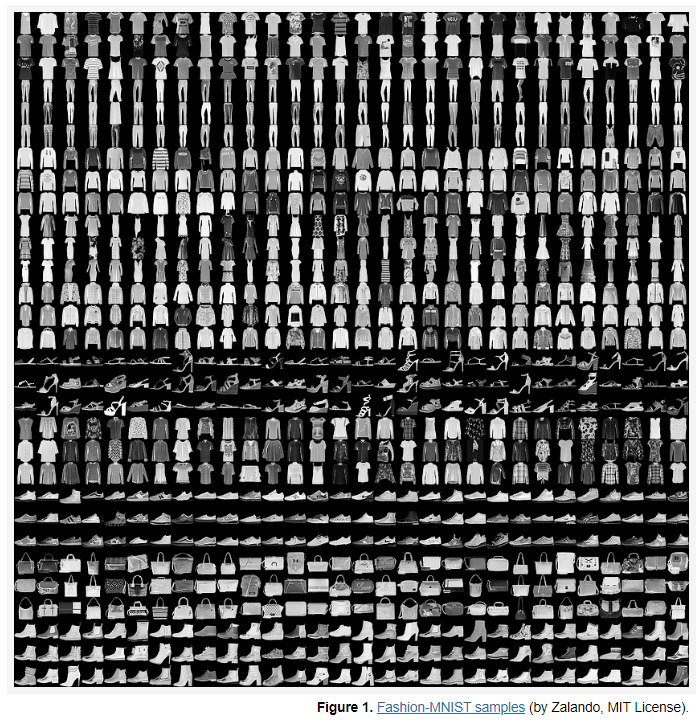

In [2]:
from IPython.display import Image
display(Image(filename='zalando mnist.png'))

NB. Il dataset è open source e disponibile con la libreria keras e restituisce i train e test set insieme alla colonna target. I dati andranno comunque pre-processati prima di essere applicati nel modello. Verrà spiegato nel dettaglio nella sezione 2.

In [3]:
# Fissare il seed per la riproducibilità
random.seed(11)
tf.random.set_seed(11)

In [4]:
# Upload dataset Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 1) ANALISI ESPLORATIVA

In questa sezione di analisi esplorativa viene descritto il dataset e ne vengono estratte le informazioni principali.

In [5]:
# Concatenaiamo i dati di addestramento e test per avere il dataset intero su cui analizzare i dati
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

Informazioni di base sul dataframe, come il numero di righe e il numero di labels.

In [6]:
images_flat = images.reshape(images.shape[0], -1)
df = pd.DataFrame(images_flat)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 52.3 MB


Il dataset Contiene 70000 righe di tipo int e 784 colonne. Ogni riga contiene informazioni su una singola "immagine". La colonna "label" è la colonna target, e identifica il capo di abbigliamento raffigurato nell'immagine. Le altre 784 colonne denominate sono i pixel che formano l'immagine.

In [8]:
# Colonna target
df['label'] = labels

# Stampa le prime 5 righe del DataFrame per controllo
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Count valori nulli**

In [9]:
# Count valori nulli per colonna
df.isna().sum()

0        0
1        0
2        0
3        0
4        0
        ..
780      0
781      0
782      0
783      0
label    0
Length: 785, dtype: int64

In [58]:
# Valori nulli totali
total_nulls = df.isnull().sum().sum()
print("Non ci sono valori nulli, il count del totale è:",total_nulls,".")

Non ci sono valori nulli, il count del totale è: 0 .


**Valori unici nella colonna label**

Nel seguente chunk si contano quanti valori unici ci sono nella colonna labels:

In [11]:
# Numero totale di valori univoci nella colonna `label` 
len(df['label'].unique ())

10

Dal precedente count dei labels si osservano 10 valori distinti (interi da 0 a 9).

La codifica degli elementi della colonna label è definita come segue:

0 - Tshirt

1 - Pantaloni 

2 - Maglione

3 - Vestito

4 - Cappotto

5 - Sandalo

6 - Camicia

7 - Sneakers

8 - Borsa

9 - Stivale

**Numero di valori per ogni elemento del dataset:**

Si osservano **7000** immagini associate a ciascuna etichetta, per un totale di 10 * 7000 = **70000** immagini. Si tratta di un set di dati bilanciato in termini di distribuzione delle classi.

In [12]:
print(df['label'].value_counts())

9    7000
0    7000
3    7000
2    7000
7    7000
5    7000
1    7000
6    7000
4    7000
8    7000
Name: label, dtype: int64


**Creazione di una nuova colonna che sostituisce i valori da 0 a 9 della colonna labels con i nomi degli articoli per visualizzarli nei grafici successivi**

In [13]:
# Dizionario di mappatura da valori numerici a nomi degli articoli
mappatura = {
    0: 'T-shirt',
    1: 'Pantaloni',
    2: 'Maglione',
    3: 'Vestito',
    4: 'Cappotto',
    5: 'Sandalo',
    6: 'Camicia',
    7: 'Sneakers',
    8: 'Borsa',
    9: 'Stivali'
}

# Valori nella colonna da sostituire
df['Articoli'] = df['label'].replace(mappatura)

#visualizzazione prime righe del df per confermare l'aggiunta della nuova colonna Articoli
df.head()

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,label,Articoli
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,Stivali
1,0,0,0,0,0,1,0,0,0,0,...,130,76,0,0,0,0,0,0,0,T-shirt
2,0,0,0,0,0,0,0,0,0,22,...,1,0,0,0,0,0,0,0,0,T-shirt
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,3,Vestito
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T-shirt


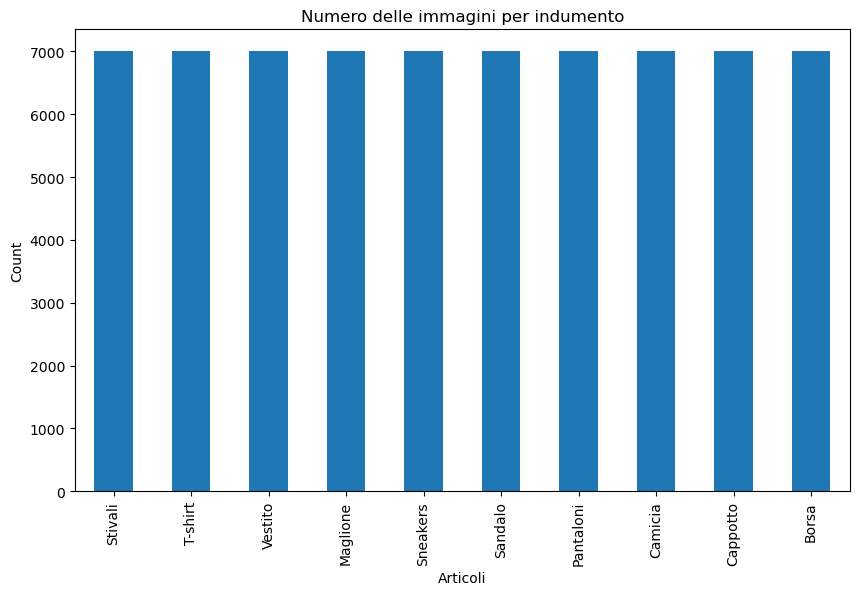

In [14]:
# Grafico a barre che contiene il count questi valori
plt.figure(figsize=(10, 6))
df['Articoli'].value_counts().plot(kind='bar')
plt.title('Numero delle immagini per indumento')
plt.xlabel('Articoli')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()

**Visualizzazione immagini**
Nel grafico in basso sono mostrate le prime 25 immagini del dataset utilizzato.

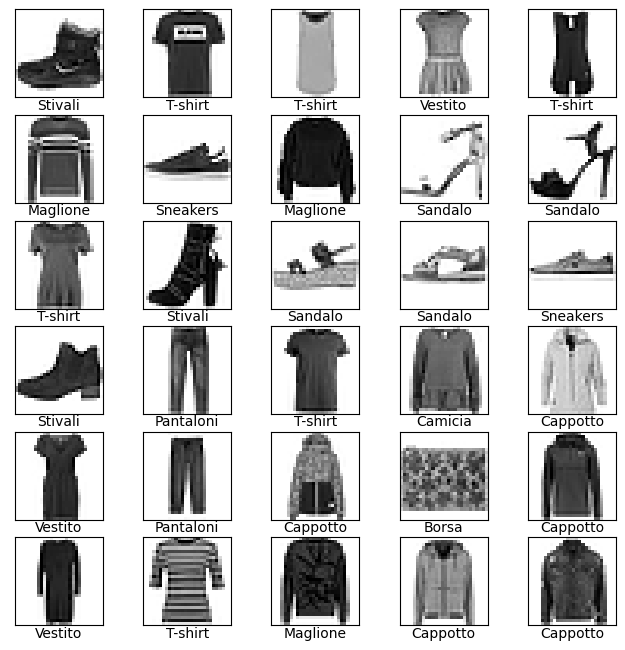

In [15]:
# Dimensioni immagine
plt.figure(figsize=(8,8))
# Plot prime 25 immagini
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(df.iloc[:,:-2].iloc[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(df['Articoli'].iloc[i], labelpad=-3)

# 2) Data Preprocessing 

Ai fini dell'applicazione di un modello di reti neurali, si riprendono i train e e test set delle chunk iniziali caricate nella sezione iniziale. Il dataset di train è circa 86% del dataset originale, mentre il test set circa il 14%.

I dati devono essere pre-prcessati prima dell' addestramento delle rete (analogamente a quanto è stato fatto per la sezione 1 di questo documento). Se si esamina un'immagine del train set, si noterà che i valori dei pixel sono compresi nell'intervallo da 0 a 255. 

Pertanto è opportuno effettuale lo scaling delle variabili in un intervallo compreso tra 0 e 1 prima di applicare un modello di reti neurali sia al test che al train set poichè ridimensionamento delle funzionalità può accelerare la convergenza del processo di training e migliorare la stabilità del modello.

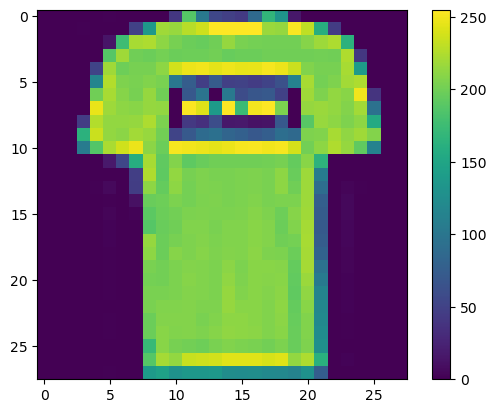

In [16]:
#Visualizzazione di un'immagine del train set con un colorbar che mostra il numero di pizel utilizzati nell'immagine, 255.
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

**Scaling delle variabili**

Per eseguire lo scaling delle variabili si potrebbe semplicemente normalizzare dividendo per 255, oppure applicando tecniche costruite ad hoc per il preprocesssing di dati di algoritmi di ML come ad esempio Min-Max scaling, che ridimensiona tutte le features in un intervallo compreso tra 0 e 1 utilizzando la libreria sklearn.  In questo modo i dati normalizzati delle immagini MNIST sono pronti per essere utilizzati per l' addestramento. 

In [17]:
# Reshape delle immagini in modo da avere una singola dimensione per ogni immagine
train_images = train_images.reshape((len(train_images), -1))
test_images = test_images.reshape((len(test_images), -1))

scaler = MinMaxScaler()

# Min-Max Scaling applicato ai dati di addestramento e di test
train_images= scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

# Verifica delle dimensioni dopo lo scaling
print("Dimensione delle immagini del train set dopo lo scaling (numero righe, numero colonne):", train_images.shape)
print("Dimensione delle immagini del test set dopo lo scaling (numero righe, numero colonne):", test_images.shape)

Dimensione delle immagini del train set dopo lo scaling (numero righe, numero colonne): (60000, 784)
Dimensione delle immagini del test set dopo lo scaling (numero righe, numero colonne): (10000, 784)


**Controllo per valutare se il dataset è bilanciato e se tutte le labels appaiono sia nel train sia nel test set (confermato)**

In [18]:
# Conteggio delle label nel test set
unique_labels, label_counts = np.unique(train_labels, return_counts=True)

# Count dei campi in ogni label nel test set
for label, count in zip(unique_labels, label_counts):
    print(f"Label {label}: {count} campi")

Label 0: 6000 campi
Label 1: 6000 campi
Label 2: 6000 campi
Label 3: 6000 campi
Label 4: 6000 campi
Label 5: 6000 campi
Label 6: 6000 campi
Label 7: 6000 campi
Label 8: 6000 campi
Label 9: 6000 campi


In [19]:
# Conteggio delle label nel test set
unique_labels, label_counts = np.unique(test_labels, return_counts=True)

# Count dei campi in ogni label nel test set
for label, count in zip(unique_labels, label_counts):
    print(f"Label {label}: {count} campi")

Label 0: 1000 campi
Label 1: 1000 campi
Label 2: 1000 campi
Label 3: 1000 campi
Label 4: 1000 campi
Label 5: 1000 campi
Label 6: 1000 campi
Label 7: 1000 campi
Label 8: 1000 campi
Label 9: 1000 campi


Poichè per ogni label è presente lo stesso numero di campi, si può dedurre che il dataset è opportunamente bilanciato.

# 3) Modelling

Per costruire un modello di rete neurale per il dataset Fashion MNIST, si può utilizzare una combinazione di diversi tipi di elementi come il numero di layer, le epoche, gli hidden layers o il tipo di funzione di attivazione. In questa sezione verranno effettuate diverse prove variando i diversi parametri al fine di individuare il miglior modello per questo dataset.

In [20]:
###############################################################################################################################
#                                           MODELLO 1
##############################################################################################################################

**Configurazione di Base:**
Il primo modello definisce un modello di rete neurale sequenziale (una pila lineare di layer), con tre layers.

Parametri: 

**Numero di Layer**
L'elemento di base di una rete neurale è il layer. I layer estraggono rappresentazioni dai dati che vengono loro forniti. Viene impostato il metodo Sequential, che consente di costruire un modello definendo una sequenza di layer. Nel primo esempio si usa Flatten, che trasforma il formato delle immagini da un array 2D a 1D. Contribuisce a riformattare i dati ma non i parametri di apprendimento. Questo livello è seguito da altri due livelli Densi, strati neurali completamente connessi di cui il primo layer ha 128 neuroni. Il secondo layer restituisce il numero di neuroni nel layer di output, corrispondente al numero di classi nel problema di classificazione, che nel caso in esame sono 10. 

**Funzione di attivazione** 
Introduce la non linearità necessaria per far apprendere ai modelli pattern complessi. In questa prima parte si utilizza la funzione di attivazione ReLU (Rectified Linear Unit). ReLU introduce la non-linearità e viene comunemente usata negli hidden layers. Il layer di output è solitamente seguito da una funzione di attivazione softmax (applicata durante la compilazione del modello) per trasformare i logit in probabilità.  

In [21]:
model1 = tf.keras.Sequential([
    #Aggiunta layer di input
    tf.keras.layers.Flatten(input_shape=(784,)),
    #Hidden Layer
    tf.keras.layers.Dense(128, activation='relu'),
    #Output layer
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\User\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



**Compilazione del modello**

Impostazioni da aggiungere prima di applicare il modello:
- **ottimizzatore**, metodo utilizzato per aggiornare i pesi dei neuroni nella rete neurale al fine di minimizzare la funzione di perdita durante l'addestramento. In questo caso si utilizza l' ottimizzatore Adam, un metodo di discesa del gradiente stocastica che si adatta automaticamente al **learning rate**, che determina quanto i parametri del modello devono essere regolati durante ogni interazione dell'algoritmo di ottimizzazione). La scelta dell'ottimizzatore può avere un impatto significativo sulla velocità di convergenza e sulla qualità del modello finale e alla sua funzionde di perdita;
- **funzione di perdita**, deve essere minimizzata ai fini della realizzazione di un buon modello. In questo caso la loss function è SparseCategoricalCrossentropy, utilizzata per la classificazione categoriale con diversi label;
- *mMetrica**, serve a monitorare le fasi di addestramento e di test. In questo caso verrà utilizzata l' accuracy.

Per addestrare il modello di rete neurale, si alimenta il modello con i dati.
Un altro parametro importante è il numero di **epoche**, che corrisponde al numero di volte in cui l'intero set di dati viene mostrato alla rete durante l'addestramento. Un'epoca è un termine che descrive un ciclo completo attraverso l'intero dataset di train. Durante ogni epoca, il modello fa delle previsioni sui dati di addestramento, calcola la perdita (cioè l'errore delle previsioni rispetto ai valori reali) e utilizza l'algoritmo di retropropagazione per aggiornare i pesi in modo da ridurre la perdita.Si inizia con un numero di 10 epoche.

In [22]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history1 = model1.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7789 - loss: 0.6349 - val_accuracy: 0.8398 - val_loss: 0.4507
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8616 - loss: 0.3876 - val_accuracy: 0.8579 - val_loss: 0.3974
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8784 - loss: 0.3390 - val_accuracy: 0.8664 - val_loss: 0.3749
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8877 - loss: 0.3114 - val_accuracy: 0.8719 - val_loss: 0.3571
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8960 - loss: 0.2911 - val_accuracy: 0.8698 - val_loss: 0.3547
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9005 - loss: 0.2743 - val_accuracy: 0.8699 - val_loss: 0.3552
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9051 - loss: 0.2616 - val_accuracy: 0.8714 - val_loss: 0.3522
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9090 - loss: 0.2490 - 

**Accuracy**
Calcolo accuracy rispetto al test set

In [23]:
#Funzione che calcola accuracy
def accuracy(model1, test_images, test_labels):
    test_loss, test_acc = model1.evaluate(test_images,  test_labels)
    print('\nTest accuracy:', round(test_acc, 2))

In [24]:
#Funzione che fa i grafici
def graph(history1):
    
    # Estrazione dati di addestramento e validazione dalla history
    acc = history1.history['accuracy']
    val_acc = history1.history['val_accuracy']
    loss = history1.history['loss']
    val_loss = history1.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    # Grafico per la loss funct
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

    # Grafico per l'accuratezza
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0,1)
    plt.legend()
    plt.show()

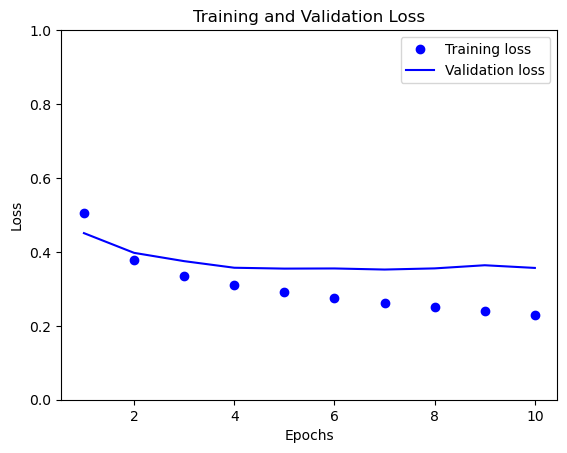

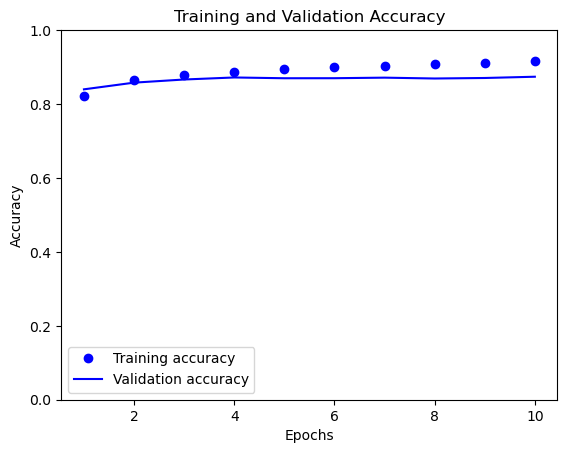

In [25]:
graph(history1)

In [26]:
accuracy(model1, test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8757 - loss: 0.3469

Test accuracy: 0.87


I grafici 1 e 2 che mostrano i valori calcolati di loss function e accuracy (Grafici 1 e 2 rispettivamente), mostrano con i valori definiti dalla rete così costruita. E' evidente che i trend tra i due set si discostano, in particolare nonostante il trend dell' accuracy sembra essere costante con il numero di epoche, l' accuratezza sul training è maggiore di quella sul test al v<riare del numero di epoche, lasciando intendere che un modello con questi parametri non si presta ancora ad essere definito un buon modello. Questa differenza tra i due set di dati è ancora più evidente nel grafico della loss function. 

In [27]:
##############################################################################################################################
#                                        MODELLO 2
##############################################################################################################################

In questo secondo caso si lascia invariata la definizione del modello ma si aumenta il numero di epoche.

In [28]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history2 = model1.fit(train_images, train_labels, epochs=40, validation_data=(test_images, test_labels))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9185 - loss: 0.2233 - val_accuracy: 0.8731 - val_loss: 0.3639
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9208 - loss: 0.2140 - val_accuracy: 0.8719 - val_loss: 0.3684
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9247 - loss: 0.2068 - val_accuracy: 0.8826 - val_loss: 0.3560
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9261 - loss: 0.2004 - val_accuracy: 0.8839 - val_loss: 0.3557
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9285 - loss: 0.1945 - val_accuracy: 0.8801 - val_loss: 0.3658
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9309 - loss: 0.1886 - val_accuracy: 0.8827 - val_loss: 0.3676
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9331 - loss: 0.1825 - val_accuracy: 0.8812 - val_loss: 0.3700
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9353 - loss: 0.1764 - 

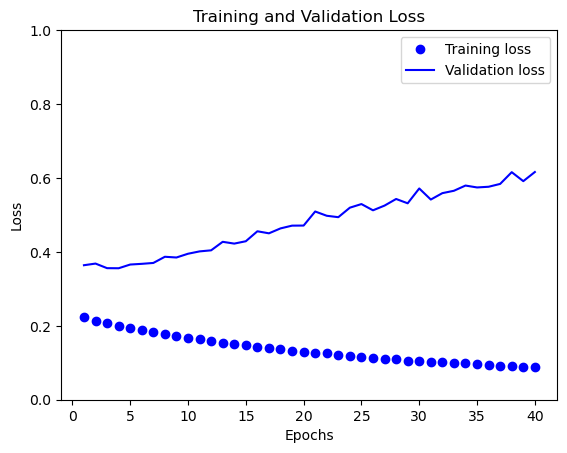

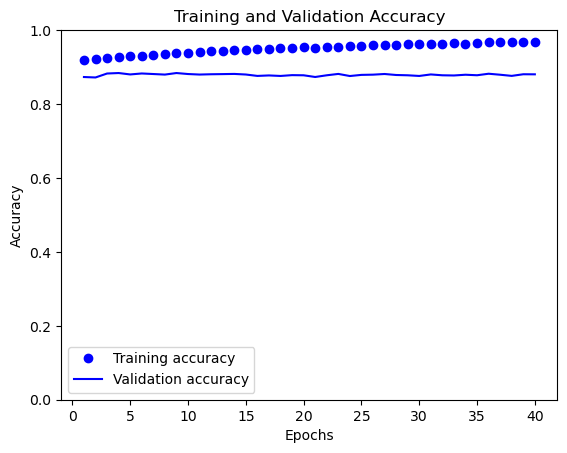

In [29]:
graph(history2)

Anche in questo caso il numero di epoche non mostra nessuna epoca a partire dal quale (o fino al quale) i due set di dati abbiano valori simili, anzi sembrano allontanarsi sempre più all'aumentare delle epoche, indicando un overfitting.

L'overfitting si verifica quando un modello ottiene risultati peggiori su input nuovi non visti in precedenza (e quindi sul test set), rispetto ai dati di train. Un modello overfitted “memorizza” il rumore e i dettagli del set di dati di training fino a un punto tale da influire negativamente sulle prestazioni del modello sui nuovi dati.

Infatti se il numero di epoche è troppo alto, il modello potrebbe apprendere troppo bene i dettagli e il rumore presenti nel dataset di addestramento, perdendo la capacità di generalizzare su dati nuovi causando overfitting.

In [30]:
accuracy(model1, test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8789 - loss: 0.6089

Test accuracy: 0.88


In [31]:
#############################################################################################################################
#                                        MODELLO 3
#############################################################################################################################

**Aumento del numero di layer**

Aumentare il numero di hidden layer nascosti potrebbe consentire al modello di catturare pattern più complessi nei dati, ma allo stesso tempo potrebbe aumentare la complessità del modello e il tempo di addestramento. In questa parte si prova ad aggiungere un modello con 3 hidden layers, a diminuire il numero di epoche e ad aumentare il numero di neuroni per layer, osservando come questo influisce sulle prestazioni complessive.

In [32]:
model3 = tf.keras.Sequential([
    #Input layer
    tf.keras.layers.Flatten(input_shape=(784, )),
    #Hidden Layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    #Ouput Layer
     tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history3 = model3.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20


C:\Users\User\anaconda3\lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7370 - loss: 0.7620 - val_accuracy: 0.8462 - val_loss: 0.4255
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8591 - loss: 0.3911 - val_accuracy: 0.8653 - val_loss: 0.3813
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8745 - loss: 0.3465 - val_accuracy: 0.8620 - val_loss: 0.3753
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8829 - loss: 0.3202 - val_accuracy: 0.8575 - val_loss: 0.3885
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8893 - loss: 0.2993 - val_accuracy: 0.8663 - val_loss: 0.3738
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8957 - loss: 0.2836 - val_accuracy: 0.8681 - val_loss: 0.3660
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8972 - loss: 0.2740 - val_accuracy: 0.8682 - val_loss: 0.3799
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9021 - loss: 0.2611 - val_accurac

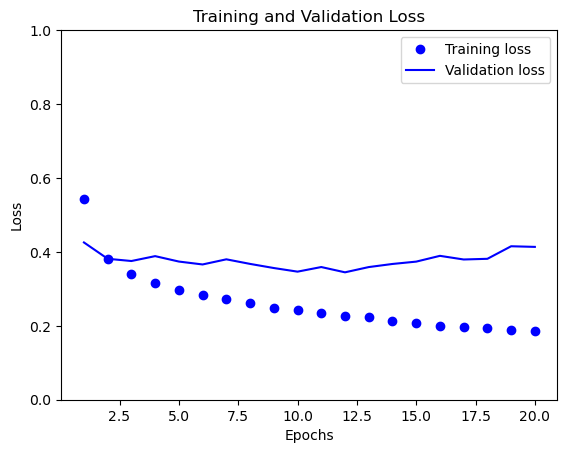

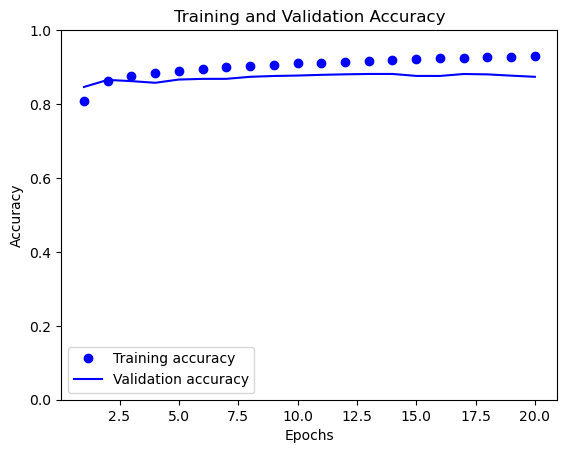

In [33]:
graph(history3)

In [34]:
accuracy(model3, test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8723 - loss: 0.4181

Test accuracy: 0.87


Aumentando il numero di layers, l' accuracy risulta essere dell' 87%, inoltre i grafici mostrano ancora un disaccordo tra gli andamenti dell' accuracy e della loss funcion tra i set test e di train, mostrando ancora overfitting.

In [35]:
###############################################################################################################################
#                                          MODELLO 4
###############################################################################################################################

Per provare a migliorare questi risultati e ridurre l' overfitting cambiando altro paramentri, si utilizza il learning rate.

**Learning rate**
Il learning rate controlla la dimensione dei passi che vengono presi durante l'ottimizzazione del modello e determina quanto velocemente il modello impara dai dati durante l'addestramento.

Un learning rate basso rende l'addestramento più stabile, poiché i pesi vengono aggiornati con passi più piccoli. Tuttavia, un tasso di apprendimento troppo basso potrebbe richiedere molto tempo per l'addestramento e questo potrebbe far sì che il modello converga lentamente o rimanga bloccato in minimi locali.

Si cambia il larning rate dell' ottimizzatore adam a 0.01 (il vaore di default utilizzato fin ora era 0.001)

In [36]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compilazione del modello utilizzando l'ottimizzatore definito
model4.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history4 = model4.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7424 - loss: 0.7181 - val_accuracy: 0.8373 - val_loss: 0.4829
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8360 - loss: 0.4672 - val_accuracy: 0.8304 - val_loss: 0.4829
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8475 - loss: 0.4378 - val_accuracy: 0.8425 - val_loss: 0.4584
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8572 - loss: 0.4138 - val_accuracy: 0.8431 - val_loss: 0.4794
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8614 - loss: 0.4027 - val_accuracy: 0.8354 - val_loss: 0.4942
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8640 - loss: 0.3885 - val_accuracy: 0.8466 - val_loss: 0.4624
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8641 - loss: 0.3918 - val_accuracy: 0.8450 - val_loss: 0.4459
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8676 - loss: 0.3778 - 

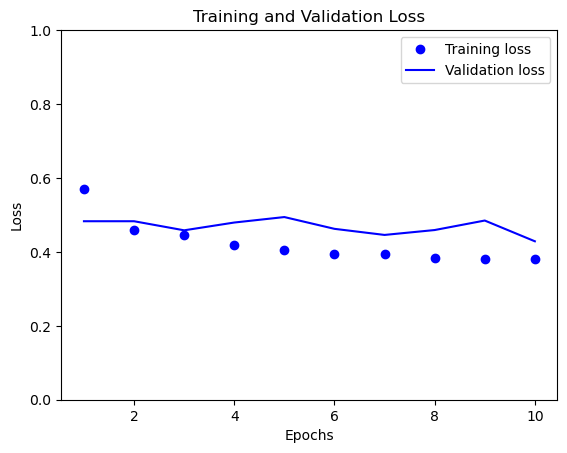

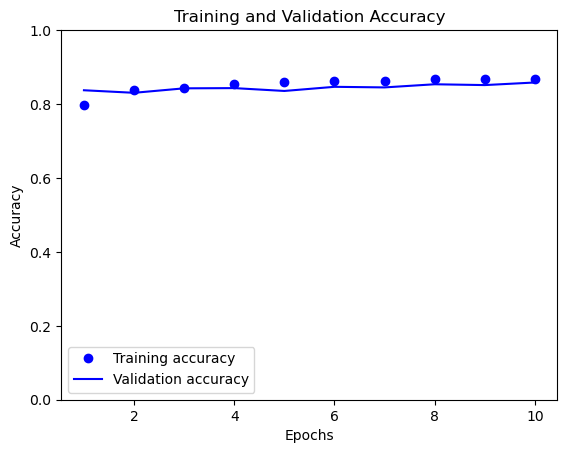

In [37]:
graph(history4)

In [38]:
accuracy(model4, test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8598 - loss: 0.4170

Test accuracy: 0.86


Aggiungendo il learning rate sembra ci sia un buon accordo tra i dati di validation e di test, con un' accuracy del' 86%.

In [39]:
##############################################################################################################################
#                                          CASO 5
##############################################################################################################################

**Funzione di attivazione**
Per questo modello si mantengono invariati i prametri precedenti e si cambiano soltanto la funzione di attivazione utilizzando RMSprop (Root Mean Square Propagation). RMSProp è un algoritmo di ottimizzazione che utilizza una media mobile del quadrato dei gradienti per scalare il learning rate di ogni parametro, adattandosi dinamicamente ai cambiamenti nel gradiente e stabilizzare l'aggiornamento dei pesi.

In [40]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model5.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history5 = model5.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7619 - loss: 0.6563 - val_accuracy: 0.8248 - val_loss: 0.4879
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8568 - loss: 0.3969 - val_accuracy: 0.8480 - val_loss: 0.4413
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8690 - loss: 0.3664 - val_accuracy: 0.8538 - val_loss: 0.4438
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8759 - loss: 0.3540 - val_accuracy: 0.8546 - val_loss: 0.4443
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8779 - loss: 0.3483 - val_accuracy: 0.8602 - val_loss: 0.4351
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8822 - loss: 0.3440 - val_accuracy: 0.8546 - val_loss: 0.4744
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8824 - loss: 0.3437 - val_accuracy: 0.8590 - val_loss: 0.4701
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8851 - loss: 0.3406 - 

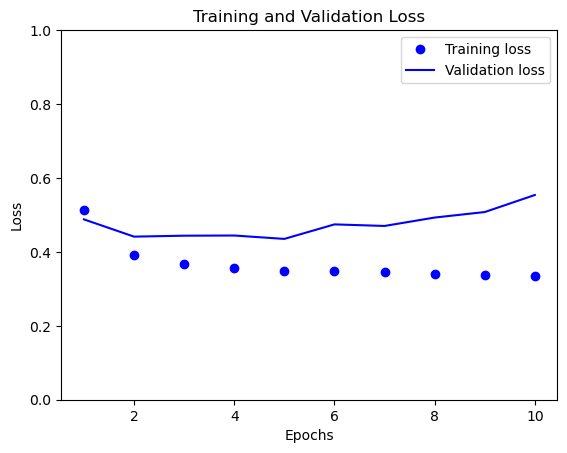

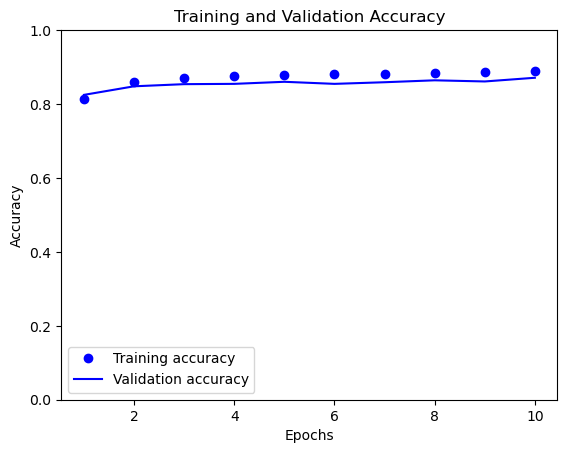

In [41]:
graph(history5)

In [42]:
accuracy(model5, test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8728 - loss: 0.5250

Test accuracy: 0.87


Nonostante ci sia un buon accordo nell'accuracy, sembra ci sia un forte disaccordo tra i det di dati per la loss function, analogamente a quanto osservato nel modello1. 

Pertanto si può concludere che tra i 5 modelli osservati, quello che sembra mostrare un miglior accordo è il modello4.

In [43]:
######################################################################################################
#                                          CASO 6
######################################################################################################

Si considera il modello 4 cercando di migliorare ulteriormente le performances aggiornando il batch size. Il batch size determina il numero di campioni utilizzati per aggiornare i pesi del modello in ogni epoca, influenzando così la frequenza degli aggiornamenti durante l'addestramento, e quindi il numero di campioni che il modello vede prima di aggiornare i pesi. Ad esempio: nel caso di batch_size=32, il modello aggiorna i suoi pesi dopo aver visto 32 campioni.  

**Batch size = 128**

In [44]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model6.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history6 = model6.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7367 - loss: 0.7333 - val_accuracy: 0.8365 - val_loss: 0.4621
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8529 - loss: 0.4026 - val_accuracy: 0.8512 - val_loss: 0.4132
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8666 - loss: 0.3687 - val_accuracy: 0.8585 - val_loss: 0.3963
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8721 - loss: 0.3503 - val_accuracy: 0.8633 - val_loss: 0.3844
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8763 - loss: 0.3388 - val_accuracy: 0.8549 - val_loss: 0.4049
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8769 - loss: 0.3377 - val_accuracy: 0.8555 - val_loss: 0.4199
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8824 - loss: 0.3261 - val_accuracy: 0.8640 - val_loss: 0.3914
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8847 - loss: 0.3218 - val_accuracy: 0.

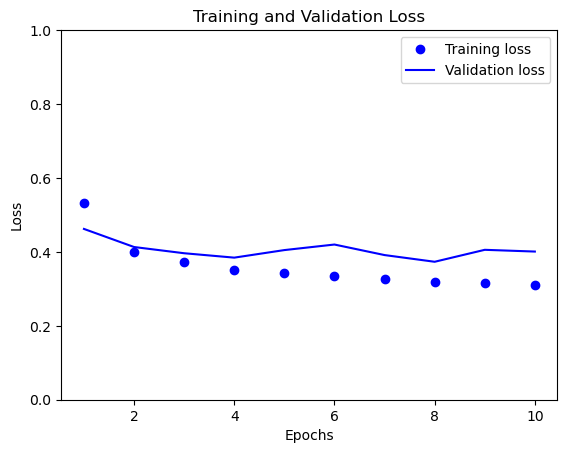

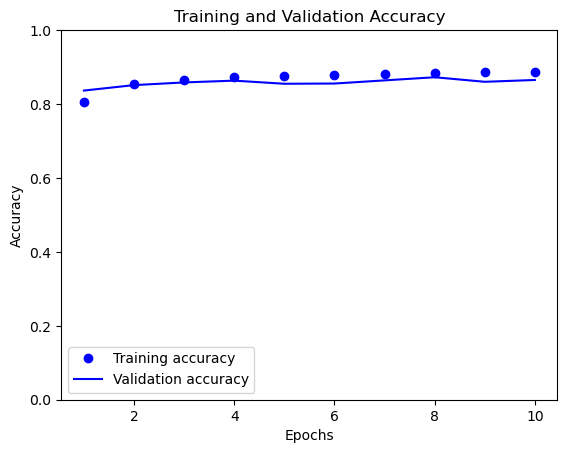

In [45]:
graph(history6)

In [46]:
accuracy(model6, test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8646 - loss: 0.3964

Test accuracy: 0.87


**Batch size = 64**

In [47]:
# Addestramento del modello con batch size = 64
model7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model7.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history7 = model7.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7443 - loss: 0.7345 - val_accuracy: 0.8366 - val_loss: 0.4529
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8478 - loss: 0.4267 - val_accuracy: 0.8422 - val_loss: 0.4507
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8576 - loss: 0.4028 - val_accuracy: 0.8438 - val_loss: 0.4505
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8653 - loss: 0.3870 - val_accuracy: 0.8560 - val_loss: 0.4098
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8748 - loss: 0.3639 - val_accuracy: 0.8520 - val_loss: 0.4239
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8750 - loss: 0.3613 - val_accuracy: 0.8520 - val_loss: 0.4349
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8753 - loss: 0.3563 - val_accuracy: 0.8586 - val_loss: 0.4103
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8778 - loss: 0.3516 - val_accuracy: 0.

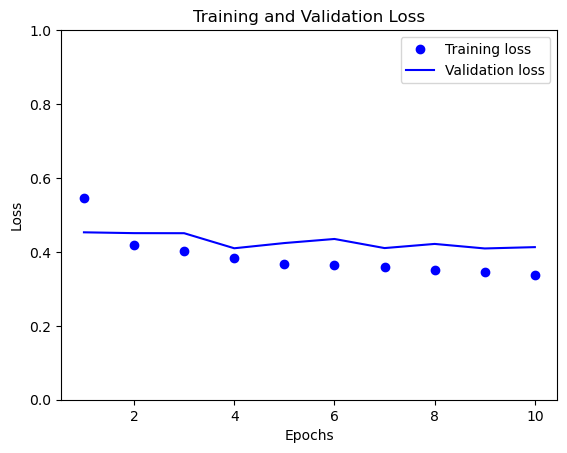

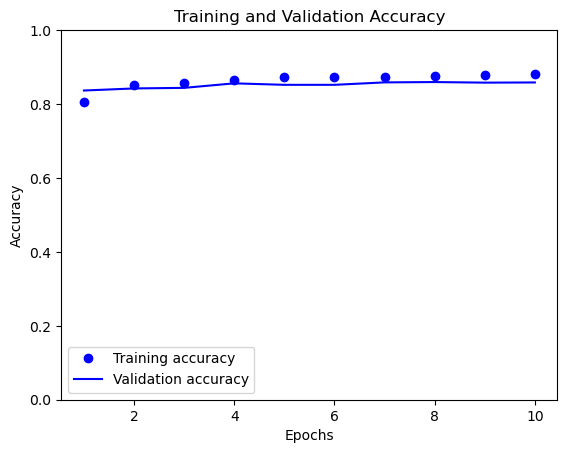

In [48]:
graph(history7)

In [49]:
accuracy(model7, test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8573 - loss: 0.4057

Test accuracy: 0.86


**Batch size = 32**

In [50]:
# Addestramento del modello con batch size = 32
model8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compilazione del modello utilizzando l'ottimizzatore definito
model8.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history8 = model8.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7384 - loss: 0.7188 - val_accuracy: 0.8268 - val_loss: 0.4963
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8404 - loss: 0.4584 - val_accuracy: 0.8227 - val_loss: 0.5030
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8496 - loss: 0.4335 - val_accuracy: 0.8436 - val_loss: 0.4944
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8531 - loss: 0.4250 - val_accuracy: 0.8467 - val_loss: 0.4563
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8583 - loss: 0.4081 - val_accuracy: 0.8529 - val_loss: 0.4229
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8616 - loss: 0.3996 - val_accuracy: 0.8601 - val_loss: 0.4248
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8680 - loss: 0.3831 - val_accuracy: 0.8467 - val_loss: 0.4474
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8646 - loss: 0.3967 - 

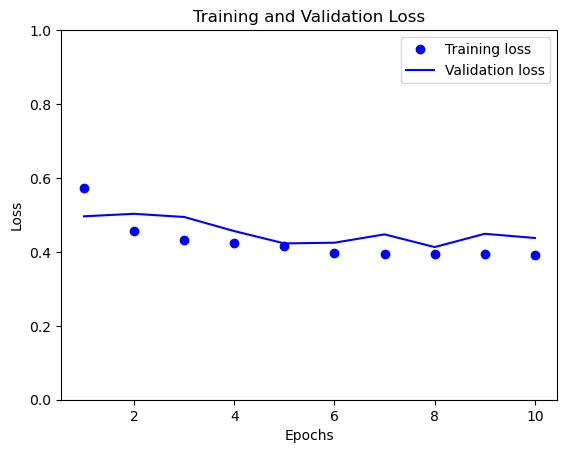

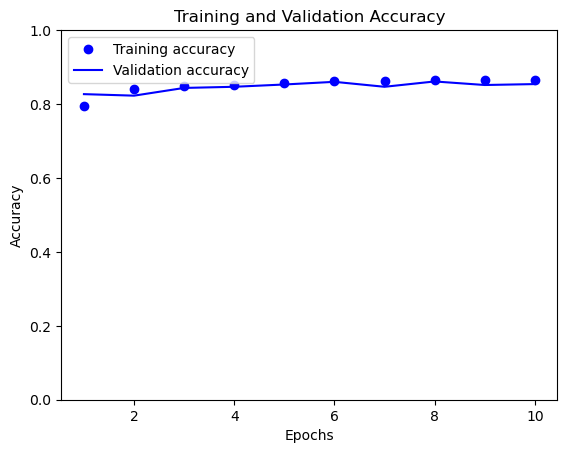

In [51]:
graph(history8)

In [52]:
accuracy(model8, test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8543 - loss: 0.4318

Test accuracy: 0.85


Anche aggiungeendo il batch size si osserva una leggera variazione dei trend di accuracy e loss function per i due set di dati, ma le variazioni sono minime. Ai fini della prediction del modello, verrà utilizzato il **modello 7**, che ha riportato un' accuratezza del 87%, poco più alta degli altri modelli.

# Prediction

Una volta addestrato il modello, è possibile utilizzarlo per fare previsioni su lla classificazione di tali immagini sul test set.

In [53]:
probability_model = tf.keras.Sequential([model7, 
                                         tf.keras.layers.Softmax()])

In [54]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Grafico che mostra tutte le previsioni.

In [55]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  img = img.reshape((28, 28))  # Ripristina l'immagine alla forma 28x28
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Di seguito si mostra il plot per ogni immagine, le predictioons e l'array di predictions. Le labels di predizione corrette (indovinate dal modello) sono blu e quelle errate sono rosse. Il numero indica la percentuale della label prevista. E' possibile osservare che la percentuale più alta di probabilità di classificazione (istogramma blu) è attribuita alla categoria reale. La categoria predetta è quella tra parentesi nell' immagine. In un subset di dati di 40 elementi, solo due sono state predette in modo errato.

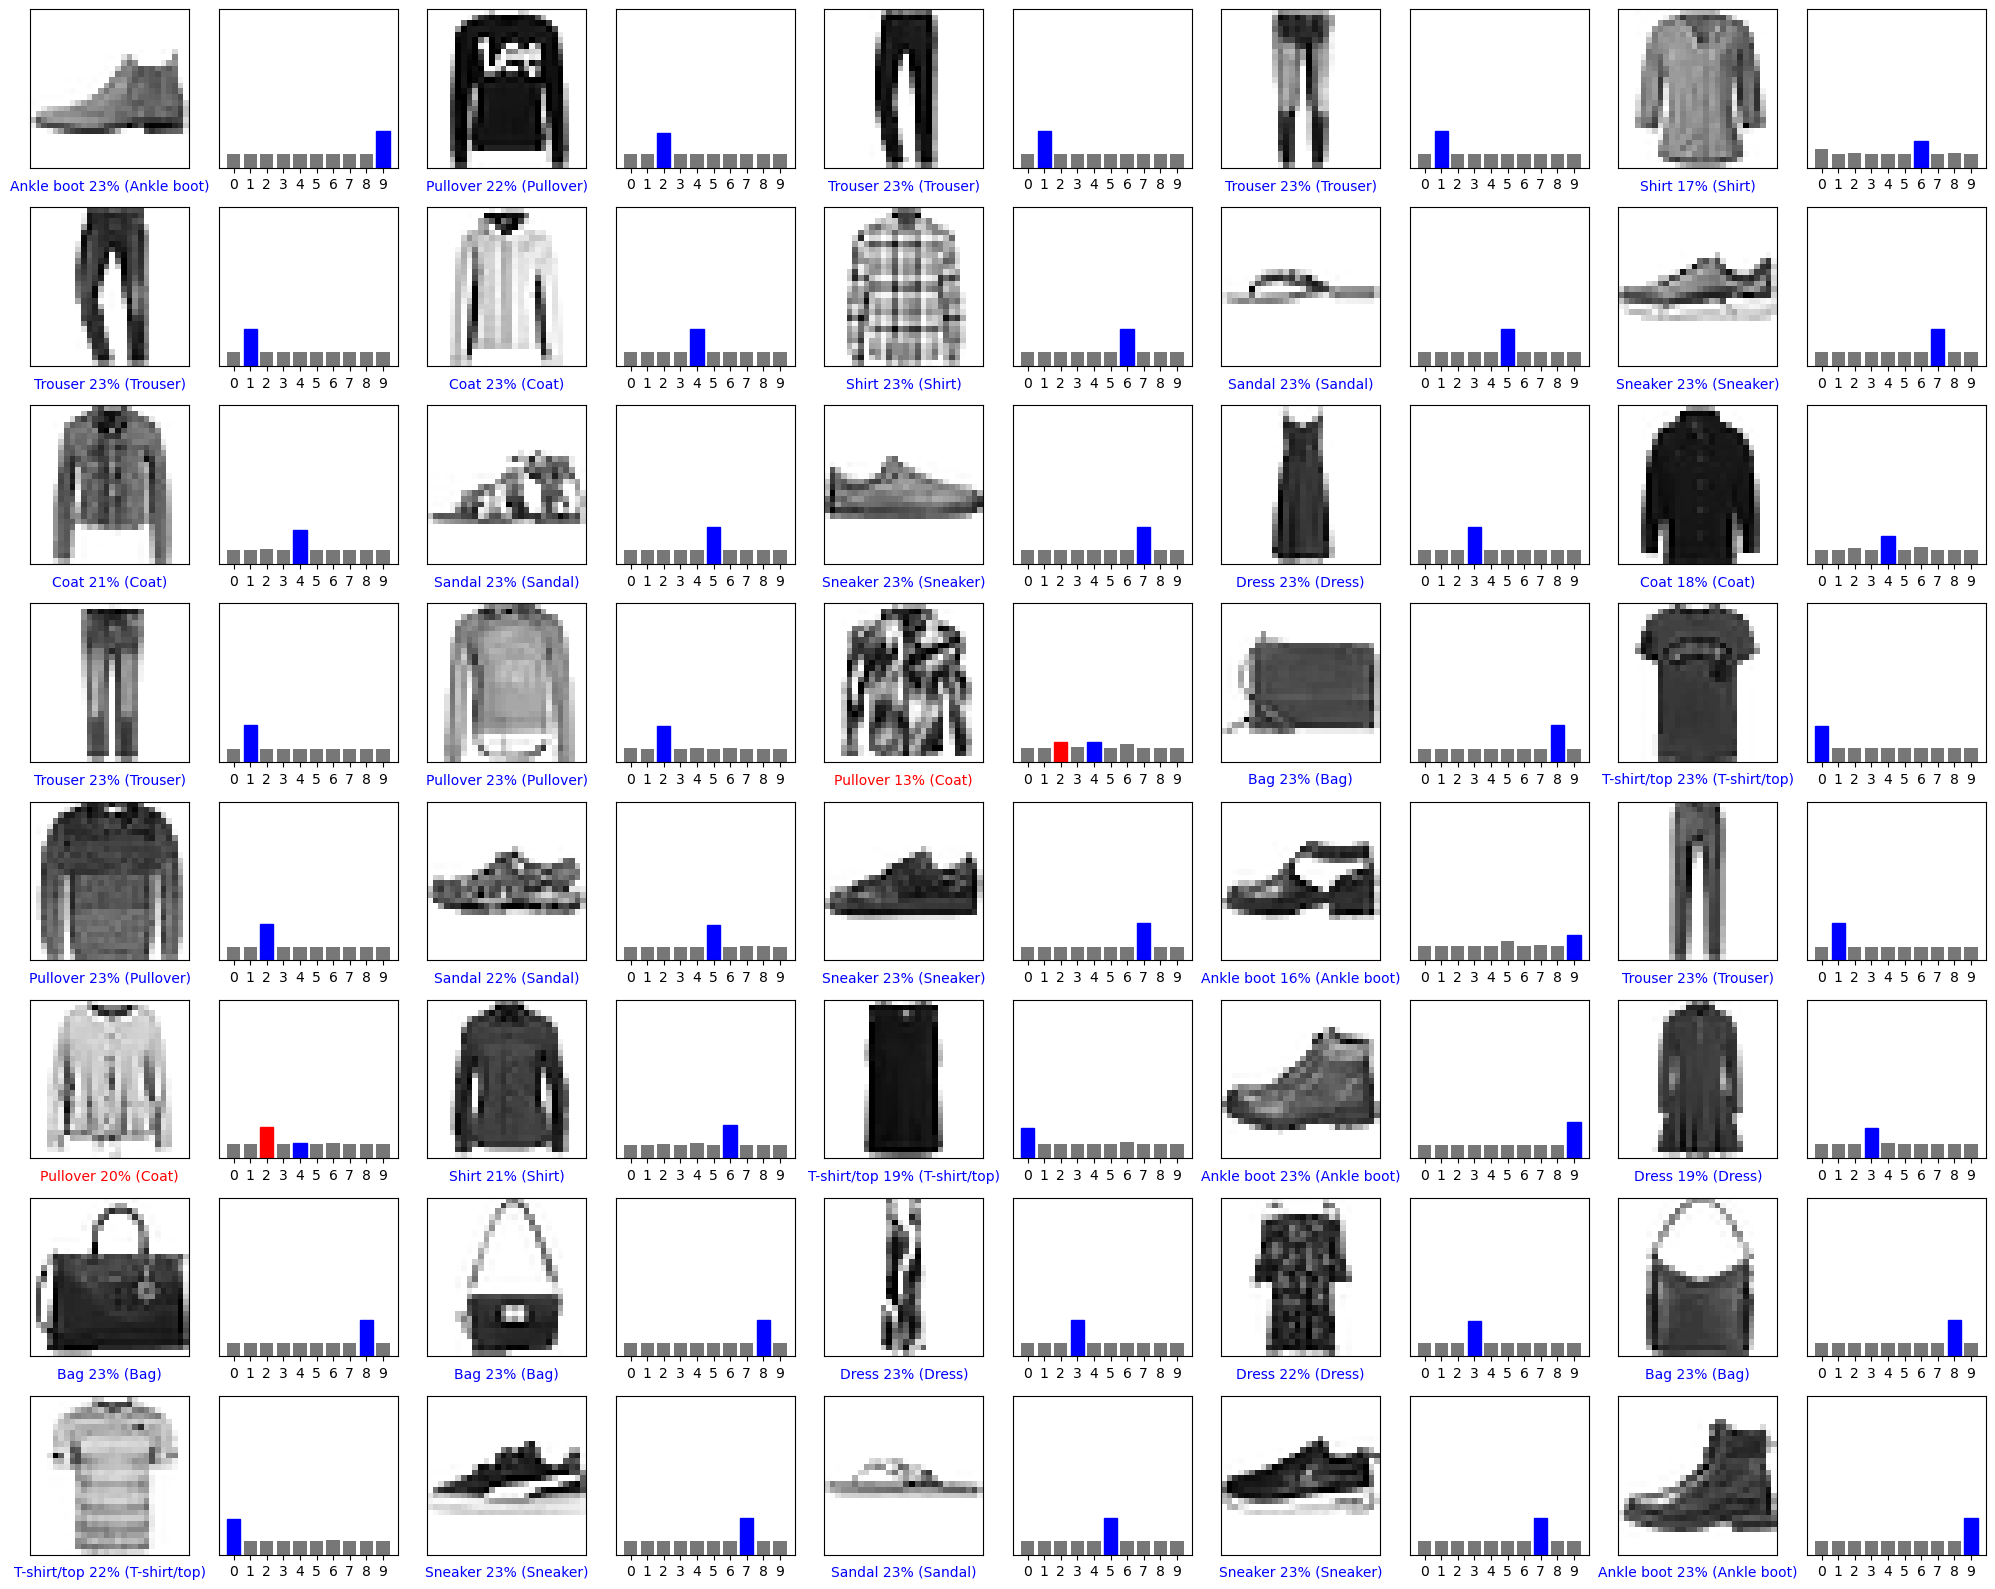

In [56]:
# Plot delle prime immagini di test, le loro label previste e le label reali a confronto.
# Previsioni corrette in blu e quelle errate (eventuali) in rosso.
num_rows = 8
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Conclusioni

In questo progetto è stato affrontato un problema di classificazione multiclasse autilizzando il dataset Fashon MNIST, che riguarda la classificazione di abiti in base al riconoscimento delle immagini. Ai fini di trovare il miglior modello con le metriche più alte possibili sono stati utilizzati 8 diversi metodi cambiando numero di layer, di epoche, funzione di attivazione, learning rate, osservando l' accuratezza di tutti questi modelli e l'andamento della funzione di train e di test per l' accuractezza e la loss function al variare delle epoche. Il miglior modello, il modello 7, ha mostrato un' accuratezza dell' 87% ed un buon accordo tra i dati di train e test per l' accuracy e per la loss function. Successivamente il miglior modello è stato utilizzato per fare prediction sul dataset di test. 

L'analisi dettagliata di un subset di immagini correttamente classificate ha rivelato che le percentuali di classificazione più alte corrispondono effettivamente alle etichette reali delle immagini selezionate, ad eccezione di due immagini sun un subset di 40 immagini che si sono è rivelate errate. Questo risultato dimostra la capacità del modello di dare priorità alle previsioni corrette, aumentando così la fiducia nella sua affidabilità nel classificare correttamente le immagini.